In [10]:
import pandas as pd
import numpy as np
import os
pd.set_option('display.width', 55)
import seaborn as sns
import matplotlib.pyplot as plt

df_raw = pd.read_csv(r"/workspaces/ml-for-forecasting/univariate/evaluations/rmse.csv")
data = pd.read_csv(r"/workspaces/ml-for-forecasting/univariate/evaluations/rmse.csv", index_col=0)
df_dataset_removed = pd.read_csv("/workspaces/ml-for-forecasting/univariate/evaluations/rmse.csv").drop(columns="fname", axis = 1)

We scaled the data using min max scaling to enable comparison and to prevent scale of each dataset affect the interpretation.

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_dataset_removed = pd.DataFrame(scaler.fit_transform(df_dataset_removed), columns=df_dataset_removed.columns)
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

The csv file consist of the performance of machine learning models against sampled univariate time series data from M4 competition (i.e., from each domain, we sampled 50 datasets). MSE was used as an evaluation metrics (performance metrics). 

Basic summary

In [12]:
df_dataset_removed.describe()

,ridge,rf,lr,gb,xbg,dt,lasso,enr,knn
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.069800,0.058082,0.033300,0.065531,0.070254,0.054507,0.059171,0.071601,0.061749
std,0.121796,0.125455,0.081382,0.127759,0.141619,0.111238,0.112587,0.125894,0.113506
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.014678,0.008624,0.005839,0.010833,0.011020,0.009026,0.012844,0.015040,0.011584
50%,0.030351,0.020458,0.011724,0.024887,0.027462,0.021562,0.025247,0.031760,0.025006
75%,0.065037,0.051752,0.029787,0.058080,0.055600,0.046914,0.053831,0.064573,0.059233
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Side-by-side box plot

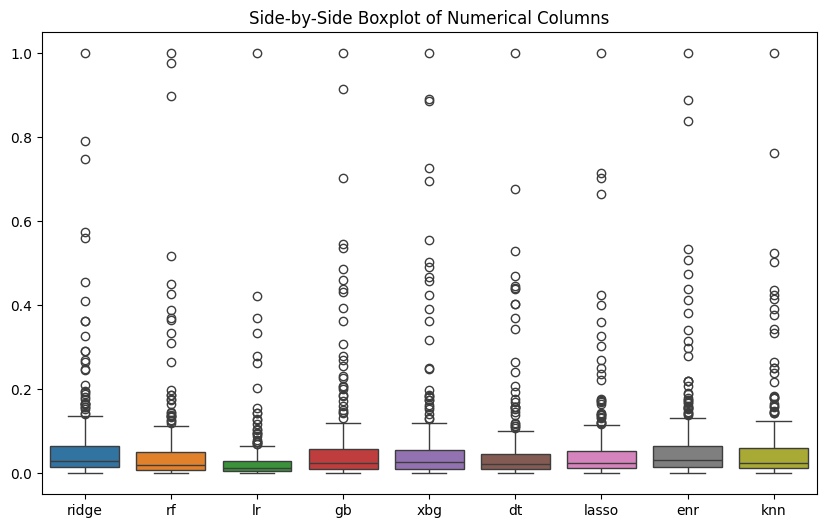

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_dataset_removed)
# Show the plot
plt.title("Side-by-Side Boxplot of Numerical Columns")
plt.show()

Side-by-side box plot where outliers are removed using IQR method. 

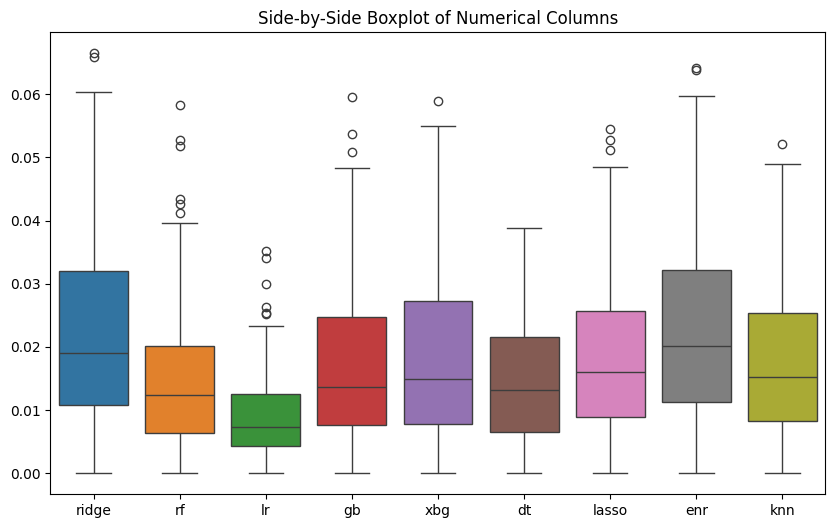

In [14]:
# Function to detect and remove outliers using the IQR method
def remove_outliers_iqr(df):
    df = df.copy(deep=True)
    for col in df.select_dtypes(
        include="number"
    ).columns:  # Loop through each numerical column
        Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
        Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1  # Interquartile range

        # Define the outlier boundaries
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove rows where the value in this column is an outlier
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df


# Assuming df is your original DataFrame
df_clean = remove_outliers_iqr(df_dataset_removed)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean)

# Show the plot
plt.title("Side-by-Side Boxplot of Numerical Columns")
plt.show()

average rank of model's performance

In [15]:
# Rank each model's performance (lower MAE = better performance, so rank ascending)
ranked_data = data.rank(axis=1, method='average', ascending=True)
# Calculate the average rank for each model across all datasets
average_ranks = ranked_data.mean(axis=0).sort_values()
# print("Average Ranks for Each Model:\n", average_ranks)
average_ranks

lr       1.848
rf       3.326
dt       3.918
gb       4.922
lasso    5.338
knn      5.494
xbg      5.690
ridge    6.926
enr      7.538
dtype: float64

Bar graph of average rank of model's performance

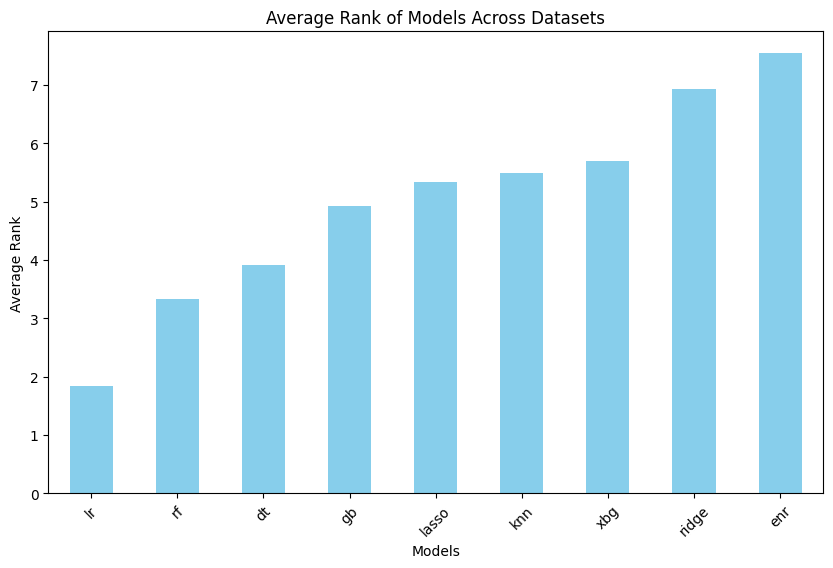

In [16]:
average_ranks.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Average Rank of Models Across Datasets')
plt.ylabel('Average Rank')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.show()

Heat map of model ranking per dataset

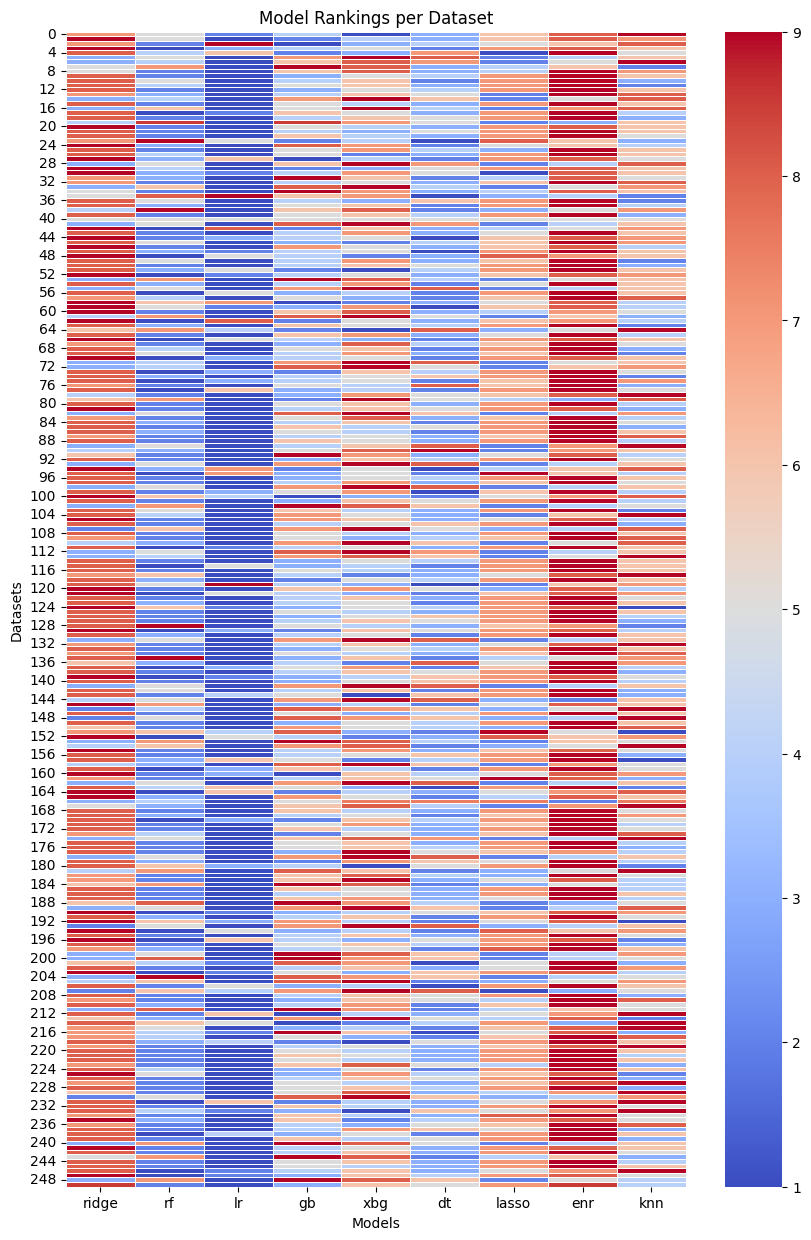

In [17]:
# Plot heatmap of ranked models
plt.figure(figsize=(10, 15))
sns.heatmap(ranked_data, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Model Rankings per Dataset')
plt.xlabel('Models')
plt.ylabel('Datasets')
plt.show()
